In [ ]:
 ## start


#print("Hello, World!")

Hello, World!


In [ ]:
# Import packages
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer

import pyarrow.parquet as pq # https://arrow.apache.org/docs/python/parquet.html

import sys
print(sys.executable)


/opt/anaconda3/envs/nt_bird_detect_conda_env_20251206/bin/python


In [ ]:
## use example to analyze and extract from wav file

# Load and initialize the BirdNET-Analyzer models.
analyzer = Analyzer()

# Latitude, Longitude = 50.94812621515316, -3.2503027074503823
# data_dir = '/Users/christianarnold/Documents/MyProjects/NatureThrive/20251122_Recordings/Data/S4A27301_20250917_103013.wav'

wave_file_2025 = '/Users/christianarnold/Documents/MyProjects/NatureThrive/20250907_Recordings/Data/S4A27301_20250818_141329.wav'

parquet_directory_path = '/Users/christianarnold/Documents/MyProjects/NatureThrive/recordings_parquet/recordings_20251210.parquet'

#print(dir)

recording = Recording(
    analyzer,
    wave_file_2025,
    lat=50.9481,
    lon=-3.2503,
    date=datetime(year=2025, month=9, day=17),  # use date or week_48
    min_conf=0.25,
)

recording.analyze()
#export_dir = "extractions"  # Directory should already exist.

# Extract to default audio files (.flac)
#recording.extract_detections_as_audio(directory=export_dir)

# Extract to spectrograms
#recording.extract_detections_as_spectrogram(directory=export_dir)

#print(recording.detections)



df_results = pd.DataFrame(recording.detections)
df_results.to_parquet(parquet_directory_path, index=False)

print(df_results.head())

Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.
read_audio_data


INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
VERBOSE: XNNPack weight cache not enabled.
VERBOSE: Replacing 245 out of 376 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 40 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
VERBOSE: XNNPack weight cache not enabled.
VERBOSE: Replacing 39 out of 56 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 7 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: becaus

read_audio_data: complete, read  1197 chunks.
analyze_recording S4A27301_20250818_141329.wav
recording has lon/lat
set_predicted_species_list_from_position
return_predicted_species_list
35
141 species loaded.
          common_name    scientific_name  start_time  end_time  confidence  \
0     Eurasian Magpie          Pica pica       288.0     291.0    0.932803   
1     Eurasian Magpie          Pica pica       297.0     300.0    0.942818   
2     Eurasian Magpie          Pica pica       300.0     303.0    0.978636   
3  Common Wood-Pigeon   Columba palumbus       738.0     741.0    0.492475   
4                Rook  Corvus frugilegus       981.0     984.0    0.527955   

                                 label  
0            Pica pica_Eurasian Magpie  
1            Pica pica_Eurasian Magpie  
2            Pica pica_Eurasian Magpie  
3  Columba palumbus_Common Wood-Pigeon  
4               Corvus frugilegus_Rook  


In [6]:
df_results["label"].nunique()

15

In [8]:
df_results.describe()

,start_time,end_time,confidence
count,39.000000,39.000000,39.000000
mean,1901.230769,1904.230769,0.516737
std,844.569260,844.569260,0.225236
min,288.000000,291.000000,0.251956
25%,1329.000000,1332.000000,0.308424
50%,2094.000000,2097.000000,0.499139
75%,2263.500000,2266.500000,0.649665
max,3582.000000,3585.000000,0.978636


In [ ]:
recordings_directory_path = '/Users/christianarnold/Documents/MyProjects/NatureThrive/20251122_Recordings/Data' #154 files
#recordings_directory_path = '/Users/christianarnold/Documents/MyProjects/NatureThrive/20250907_Recordings/Data' #176 files
#recordings_directory_path = '/Users/christianarnold/Documents/MyProjects/NatureThrive/20251209_trials_5_recordings/Data' # 5 files
parquet_directory_path = '/Users/christianarnold/Documents/MyProjects/NatureThrive/recordings_parquet/recordings_20251210.parquet'

entries = os.listdir(recordings_directory_path)

# Initialize the BirdNET-Analyzer.
analyzer = Analyzer()

for file in entries:
    directory_path_file = os.path.join(recordings_directory_path, file)
    file_date = file[9:17]
    file_time = file[18:24]
    file_year = int(file[9:13])
    file_month = int(file[13:15])
    file_day = int(file[15:17])

    recording = Recording(
        analyzer,
        directory_path_file,
        lat=50.9481,
        lon=-3.2503,
        date=datetime(year=file_year, month=file_month, day=file_day),  # use date or week_48
        min_conf=0.01,
    )
    
    print(f"Analyzing file: {file}")
    recording.analyze()

    #print("Load data into DataFrame")
    df_recordings_results = pd.DataFrame(recording.detections)
    
    #print("Read existing DataFrame back from Parquet")
    df_stored_recordings = pd.read_parquet(parquet_directory_path)

    #print("Combine both DataFrames")
    df_combined = pd.concat([df_stored_recordings, df_recordings_results], ignore_index=True)

    # 3. Save the DataFrame to a Parquet file
    # index=False tells Pandas NOT to save the row indices (0, 1, 2...) as a column
    #print("Save combined DataFrame back to Parquet")
    try:
        df_combined.to_parquet(parquet_directory_path, index=False)
    except ImportError:
        print("\nError: ")


    #print(directory_path_file)
    #print(file_date, file_time, file_year, file_month, file_day)






Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.
Analyzing file: S4A27301_20250818_181323.wav
read_audio_data


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
VERBOSE: XNNPack weight cache not enabled.
VERBOSE: Replacing 245 out of 376 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 40 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
VERBOSE: XNNPack weight cache not enabled.
VERBOSE: Replacing 39 out of 56 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 7 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact out

read_audio_data: complete, read  1199 chunks.
analyze_recording S4A27301_20250818_181323.wav
recording has lon/lat
set_predicted_species_list_from_position
return_predicted_species_list
31
135 species loaded.
Load data into DataFrame
Read existing DataFrame back from Parquet
Combine both DataFrames
Save combined DataFrame back to Parquet
Analyzing file: S4A27301_20250818_141329.wav
read_audio_data
read_audio_data: complete, read  1197 chunks.
analyze_recording S4A27301_20250818_141329.wav
recording has lon/lat
set_predicted_species_list_from_position
Load data into DataFrame
Read existing DataFrame back from Parquet
Combine both DataFrames
Save combined DataFrame back to Parquet
Analyzing file: S4A27301_20250818_161323.wav
read_audio_data
read_audio_data: complete, read  1199 chunks.
analyze_recording S4A27301_20250818_161323.wav
recording has lon/lat
set_predicted_species_list_from_position
Load data into DataFrame
Read existing DataFrame back from Parquet
Combine both DataFrames
Save

In [ ]:



parquet_directory_path = '/Users/christianarnold/Documents/MyProjects/NatureThrive/recordings_parquet/recordings_20251210.parquet'

df_stored_recordings = pd.read_parquet(parquet_directory_path)

# Get number of unique labels
#df_1 = df_stored_recordings["label"].nunique()
#print(df_1)

# Get count of call per bird
#df_counts = df_stored_recordings['label'].value_counts()
#print(df_counts)

# Filter for confidence above 0.5
df_filtered = df_stored_recordings[df_stored_recordings['confidence'] > 0.5]['label'].value_counts()
print(df_filtered)

''' # 20251210: first run on 5 files with confidence>0.5
label
Corvus frugilegus_Rook                     21
Psittacula krameri_Rose-ringed Parakeet    17
Corvus corone_Carrion Crow                 11
Erithacus rubecula_European Robin           9
Numenius arquata_Eurasian Curlew            7
Pica pica_Eurasian Magpie                   6
Ardea cinerea_Gray Heron                    6
Picus viridis_Eurasian Green Woodpecker     2
Turdus iliacus_Redwing                      1
Anas platyrhynchos_Mallard                  1
Podiceps cristatus_Great Crested Grebe      1
Corvus cornix_Hooded Crow                   1
Fulica atra_Eurasian Coot                   1
Branta canadensis_Canada Goose              1
Name: count, dtype: int64
'''


label
Corvus frugilegus_Rook                     21
Psittacula krameri_Rose-ringed Parakeet    17
Corvus corone_Carrion Crow                 11
Erithacus rubecula_European Robin           9
Numenius arquata_Eurasian Curlew            7
Pica pica_Eurasian Magpie                   6
Ardea cinerea_Gray Heron                    6
Picus viridis_Eurasian Green Woodpecker     2
Turdus iliacus_Redwing                      1
Anas platyrhynchos_Mallard                  1
Podiceps cristatus_Great Crested Grebe      1
Corvus cornix_Hooded Crow                   1
Fulica atra_Eurasian Coot                   1
Branta canadensis_Canada Goose              1
Name: count, dtype: int64


/var/folders/mf/7g4_hnrj2ws75zhpp34jrc_80000gn/T/ipykernel_6583/721133700.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(data_dir)


number of channels = 2
length = 3592.0s


/opt/anaconda3/envs/nt_bird_detect_conda_env_20251206/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


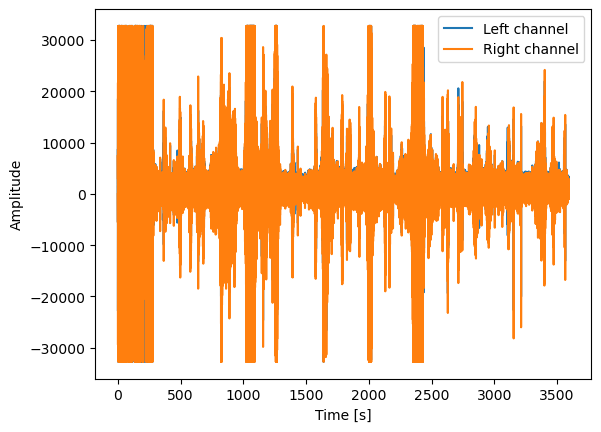

In [9]:
## get files from directory

from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

data_dir = '/Users/christianarnold/Documents/MyProjects/NatureThrive/20250907_Recordings/Data/S4A27301_20250818_141329.wav'

samplerate, data = wavfile.read(data_dir)
print(f"number of channels = {data.shape[1]}")

length = data.shape[0] / samplerate
print(f"length = {length}s")


time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
import pandas as pd
import os

## ca_note: parquet example

# 1. Define the filename for the output
output_file = '/Users/christianarnold/Documents/MyProjects/NatureThrive/bio-acoustic-monitor/standalone_example.parquet'

# 2. Create a simple Pandas DataFrame (the 'df' object)
data = {'A': [1, 2, 3], 
        'B': ['x', 'y', 'z'], 
        'C': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03'])}
df = pd.DataFrame(data)

print("Original DataFrame:\n", df)

# 3. Save the DataFrame to a Parquet file
# index=False tells Pandas NOT to save the row indices (0, 1, 2...) as a column
try:
    df.to_parquet(output_file, index=False)
    print(f"\nSuccessfully saved data to '{output_file}'")
    
    # 4. Verification: Read the data back to confirm it worked
    df_loaded = pd.read_parquet(output_file)
    print("\nDataFrame read back from Parquet:\n", df_loaded)

    # 5. Clean up the created file (optional)
    os.remove(output_file)
    
except ImportError:
    print("\nError: PyArrow or FastParquet library is required but not installed.")
    print("Run: conda install pyarrow")

Original DataFrame:
    A  B          C
0  1  x 2023-01-01
1  2  y 2023-01-02
2  3  z 2023-01-03

Successfully saved data to '/Users/christianarnold/Documents/MyProjects/NatureThrive/bio-acoustic-monitor/standalone_example.parquet'

DataFrame read back from Parquet:
    A  B          C
0  1  x 2023-01-01
1  2  y 2023-01-02
2  3  z 2023-01-03
